In [63]:
import logging
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [45]:
def load_dataset():
  """Load the MedicalCentre dataset from the working directory.

    The 'MedicalCentre.csv' file should be present directly in the working directory

    Returns
    -------
    dataset: DataFrame
        Loaded dataset from 'MedicalCentre.csv'
  """
  if not os.path.isfile("MedicalCentre.csv"):
    raise FileNotFoundError("File 'MedicalCentre.csv' not found in working directory. "
                            "Please ensure the file is present directly in the working directory ")

  dataset = pd.read_csv("MedicalCentre.csv")
  return dataset

In [46]:
dataset=load_dataset()

In [47]:
def prepare_dataset(dataset):
  """ Prepare the data for downstream processes
    This is done by dropping duplicate rows and rows with missing values

  Parameters
  ----------
  dataset: DataFrame
    Two-dimensional datastructure with labeled axes, required

  Raises
  ------
  Invalid Input error
    If input dataset is not expected datatype

  Returns
  -------
  processed_data: Dataframe

  """
  if dataset is None or not isinstance(dataset, pd.DataFrame):
    raise NotImplementedError("Dataset must be a Pandas DataFrame")

  duplicate_rows = dataset.duplicated()
  if duplicate_rows.any():
    print("Duplicate rows found at rows:", duplicate_rows[duplicate_rows].index + 1)
    dataset = dataset.drop_duplicates()
  missing_values_rows = dataset.isnull().any(axis=1)
  if missing_values_rows.any():
      print("Rows with missing values detected at rows:", missing_values_rows[missing_values_rows].index + 1)
      dataset = dataset.dropna(axis=0)

  print("\nSuccesfully dropped duplicate rows and rows with missing values")

  return dataset

In [48]:
processed_dataset = prepare_dataset(dataset)

Duplicate rows found at rows: Index([50, 70, 240], dtype='int64')
Rows with missing values detected at rows: Index([15, 30, 83, 140, 196], dtype='int64')

Succesfully dropped duplicate rows and rows with missing values


In [49]:
def visualize_dataset(processed_dataset):
  """ Prepare a scatter plot of numerical features

  Parameters
  ----------
  dataset: DataFrame
    Two-dimensional datastructure with labeled axes, required

  Raises
  ------
  Invalid Input error
    If input dataset is not expected datatype

  """
  if processed_dataset is None or not isinstance(processed_dataset, pd.DataFrame):
    raise NotImplementedError("Invalid Input")

  count = 1
  for column in processed_dataset:
    if (processed_dataset[column].dtype.kind in "iufc"):
      plt.figure(count,figsize=(4,4))
      plt.title("Scatter plot for " + column)
      plt.scatter(processed_dataset.index, processed_dataset[column])
      plt.xlabel("Index")
      plt.ylabel(column)
      count = count+1

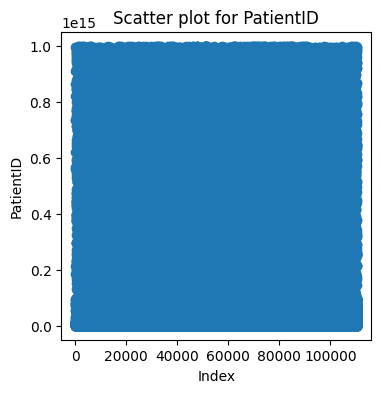

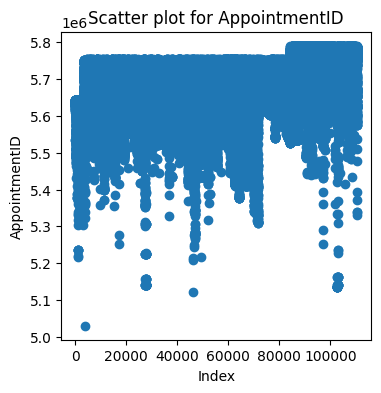

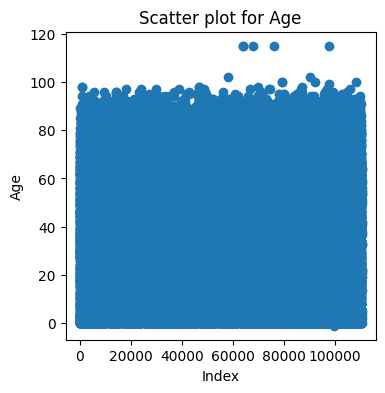

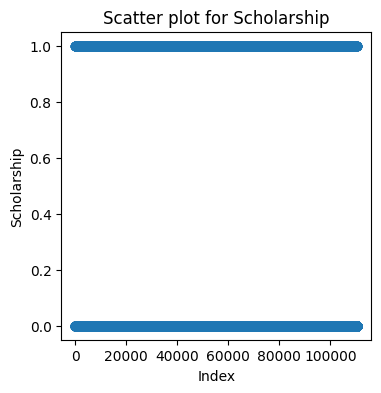

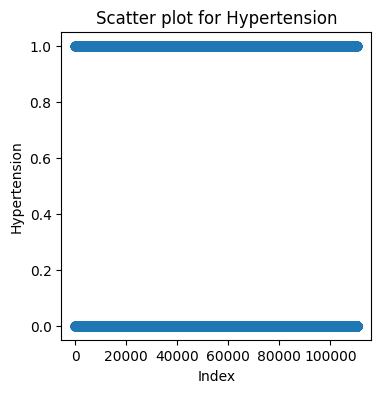

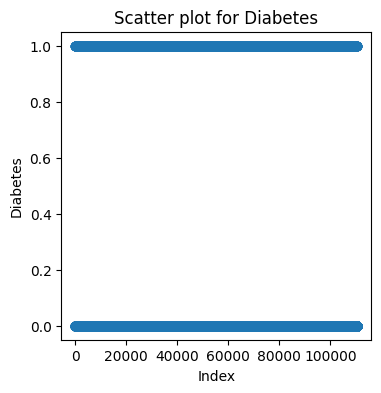

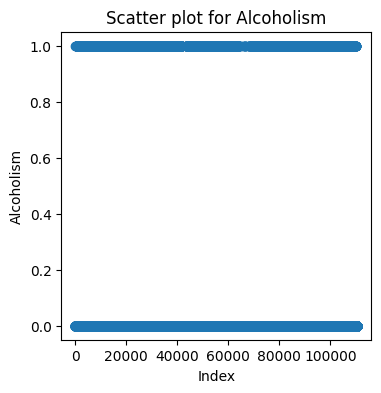

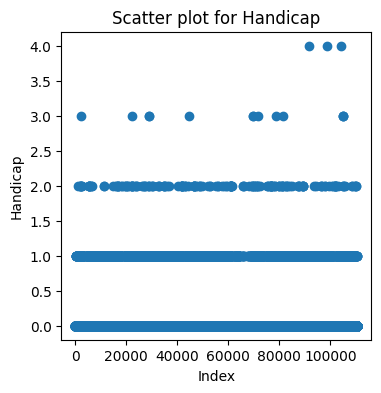

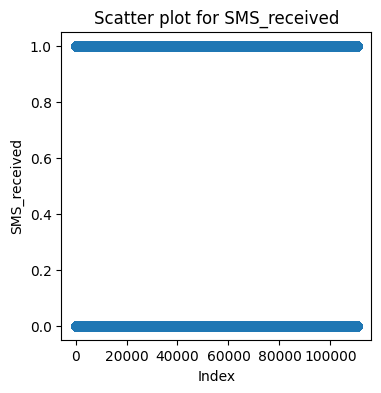

In [39]:
visualize_dataset(processed_dataset)

In [50]:
num_neg_age = (processed_dataset["Age"] < 0).sum().sum()
if num_neg_age:
  print("Number of Negative age values:" , num_neg_age)
  processed_dataset.drop(processed_dataset[processed_dataset["Age"] < 0].index, inplace = True)
  print("Successfully removed negative age values")

Number of Negative age values: 1
Successfully removed negative age values


In [52]:
processed_dataset.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29900000000000,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,559000000000000,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4260000000000,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,868000000000,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8840000000000,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


In [54]:
labelEncoder = LabelEncoder()
processed_dataset['Gender'] = labelEncoder.fit_transform(processed_dataset['Gender'])
processed_dataset['No-show'] = labelEncoder.fit_transform(processed_dataset['No-show'])
processed_dataset['Neighbourhood'] = labelEncoder.fit_transform(processed_dataset['Neighbourhood'])

In [55]:
processed_dataset.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29900000000000,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,39,0,1,0,0,0,0,0
1,559000000000000,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,39,0,0,0,0,0,0,0
2,4260000000000,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,45,0,0,0,0,0,0,0
3,868000000000,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,54,0,0,0,0,0,0,0
4,8840000000000,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,39,0,1,1,0,0,0,0


In [57]:
processed_dataset['AwaitingTime'] = pd.DatetimeIndex(processed_dataset["AppointmentDay"]) - pd.DatetimeIndex(processed_dataset["ScheduledDay"])
neg_time = processed_dataset['AwaitingTime'].dt.days < 0
if neg_time.any():
  print("Found negative awaiting time")
  processed_dataset.drop(processed_dataset[neg_time].index, inplace=True)
  print("Succesfully removed negative awaiting time")

Found negative awaiting time
Succesfully removed negative awaiting time


In [58]:
processed_dataset['ScheduledYear'] = pd.DatetimeIndex(processed_dataset["ScheduledDay"]).year
processed_dataset['ScheduledMonth'] = pd.DatetimeIndex(processed_dataset["ScheduledDay"]).month

processed_dataset['ScheduledDay'] = pd.DatetimeIndex(processed_dataset["ScheduledDay"]).day
processed_dataset['ScheduledHour'] = pd.DatetimeIndex(processed_dataset["ScheduledDay"]).hour
processed_dataset['ScheduledMin'] = pd.DatetimeIndex(processed_dataset["ScheduledDay"]).minute
processed_dataset['ScheduledSec'] = pd.DatetimeIndex(processed_dataset["ScheduledDay"]).second


processed_dataset['AppointmentYear'] = pd.DatetimeIndex(processed_dataset["AppointmentDay"]).year
processed_dataset['AppointmentMonth'] = pd.DatetimeIndex(processed_dataset["AppointmentDay"]).month

processed_dataset['AppointmentDay'] = pd.DatetimeIndex(processed_dataset["AppointmentDay"]).day
processed_dataset['AppointmentHour'] = pd.DatetimeIndex(processed_dataset["AppointmentDay"]).hour
processed_dataset['AppointmentMin'] = pd.DatetimeIndex(processed_dataset["AppointmentDay"]).minute
processed_dataset['AppointmentSec'] = pd.DatetimeIndex(processed_dataset["AppointmentDay"]).second


processed_dataset['AwaitingMinutes'] = processed_dataset['AwaitingTime'] / pd.Timedelta(minutes=1)
processed_dataset['AwaitingDays'] = processed_dataset['AwaitingTime'].dt.days
processed_dataset = processed_dataset.drop('AwaitingTime', axis=1)

In [62]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(processed_dataset.head())


          PatientID  AppointmentID  Gender  ScheduledDay  AppointmentDay  \
5    96000000000000        5626772       0            27              29   
6   734000000000000        5630279       0            27              29   
7     3450000000000        5630575       0            27              29   
9    78100000000000        5629123       0            27              29   
10  735000000000000        5630213       0            27              29   

     Age  Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
5   76.0             58            0             1         0           0   
6   23.0             25            0             0         0           0   
7   39.0             25            0             0         0           0   
9   19.0             12            0             0         0           0   
10  30.0             50            0             0         0           0   

    Handicap  SMS_received  No-show  ScheduledYear  ScheduledMonth  \
5          0    

<Axes: >

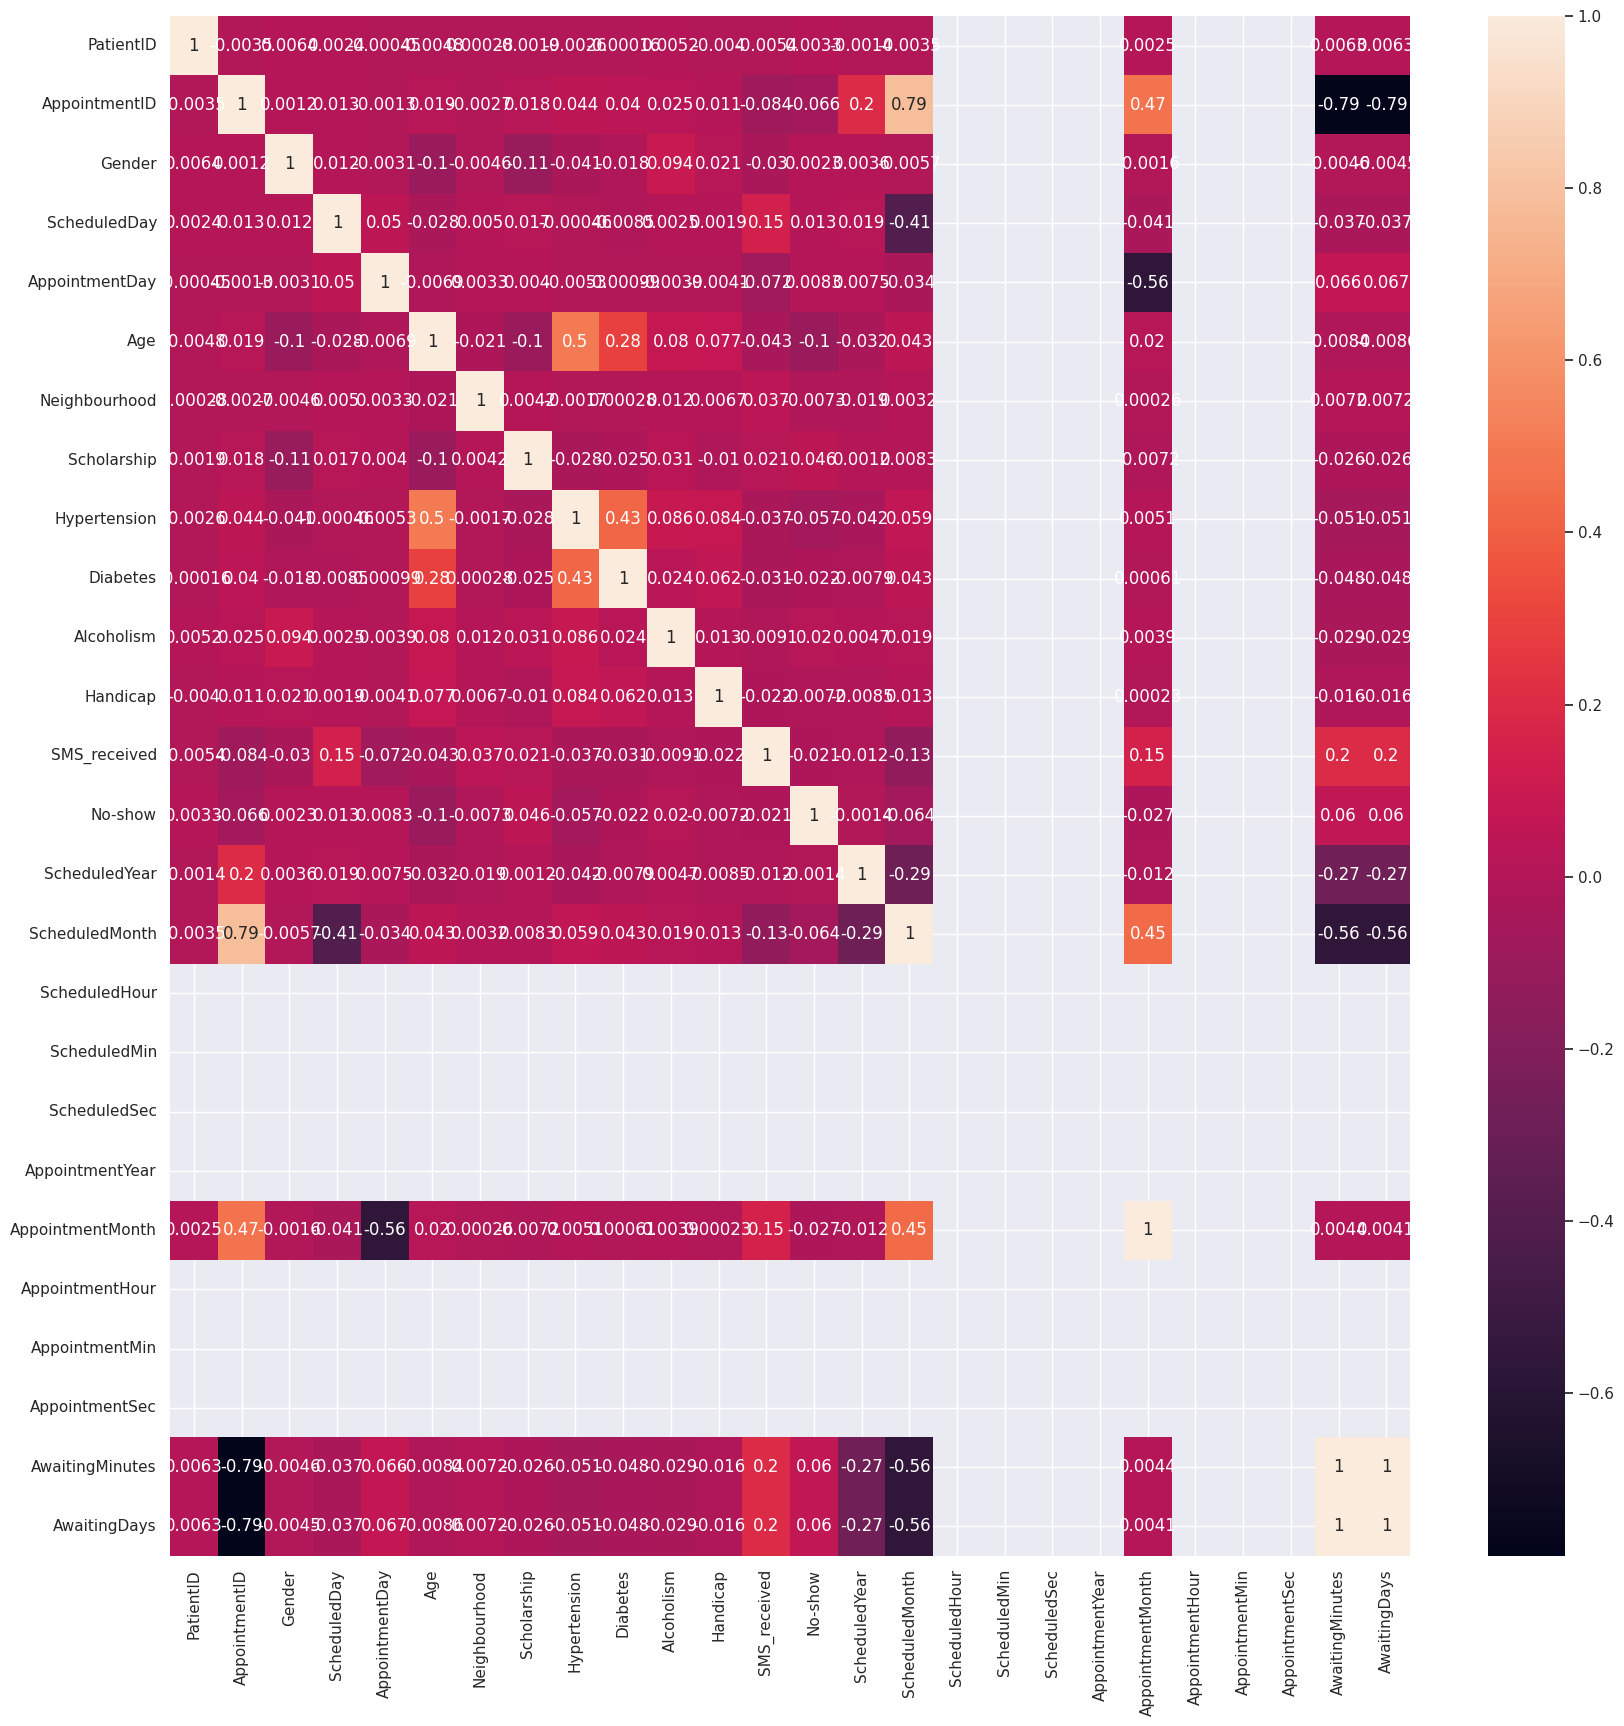

In [64]:
sns.set(rc={'figure.figsize': (20, 20)})
sns.heatmap(processed_dataset.corr(),annot=True)